<a href="https://colab.research.google.com/github/Sainaveengunda/StockMarketPrediction/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description : This project is about predecting the closing stock price of Amazon using an artificial recuurent neural network model called
               #Long Short Term Memory(LSTM) And ARIMA (Auto regressive integrated moving average) using past data.

In [ ]:
# Importing the useful libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


In [ ]:
#stock Data

df = pdr.get_data_yahoo("AMZN", start="2009-01-01", end="2023-04-03")
#show data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,2.567500,2.726500,2.553500,2.718000,2.718000,145928000
2009-01-05,2.786500,2.787000,2.651500,2.703000,2.703000,190196000
2009-01-06,2.727500,2.911000,2.687500,2.868000,2.868000,221602000
2009-01-07,2.814500,2.847500,2.767500,2.810000,2.810000,158854000
2009-01-08,2.749500,2.866000,2.729000,2.858000,2.858000,131558000
...,...,...,...,...,...,...
2023-03-27,99.070000,99.339996,97.080002,98.040001,98.040001,46721300
2023-03-28,98.110001,98.440002,96.290001,97.239998,97.239998,38720100
2023-03-29,98.690002,100.419998,98.559998,100.250000,100.250000,49783300


In [ ]:
#number of rows and columns in the data
df.shape

(3586, 6)

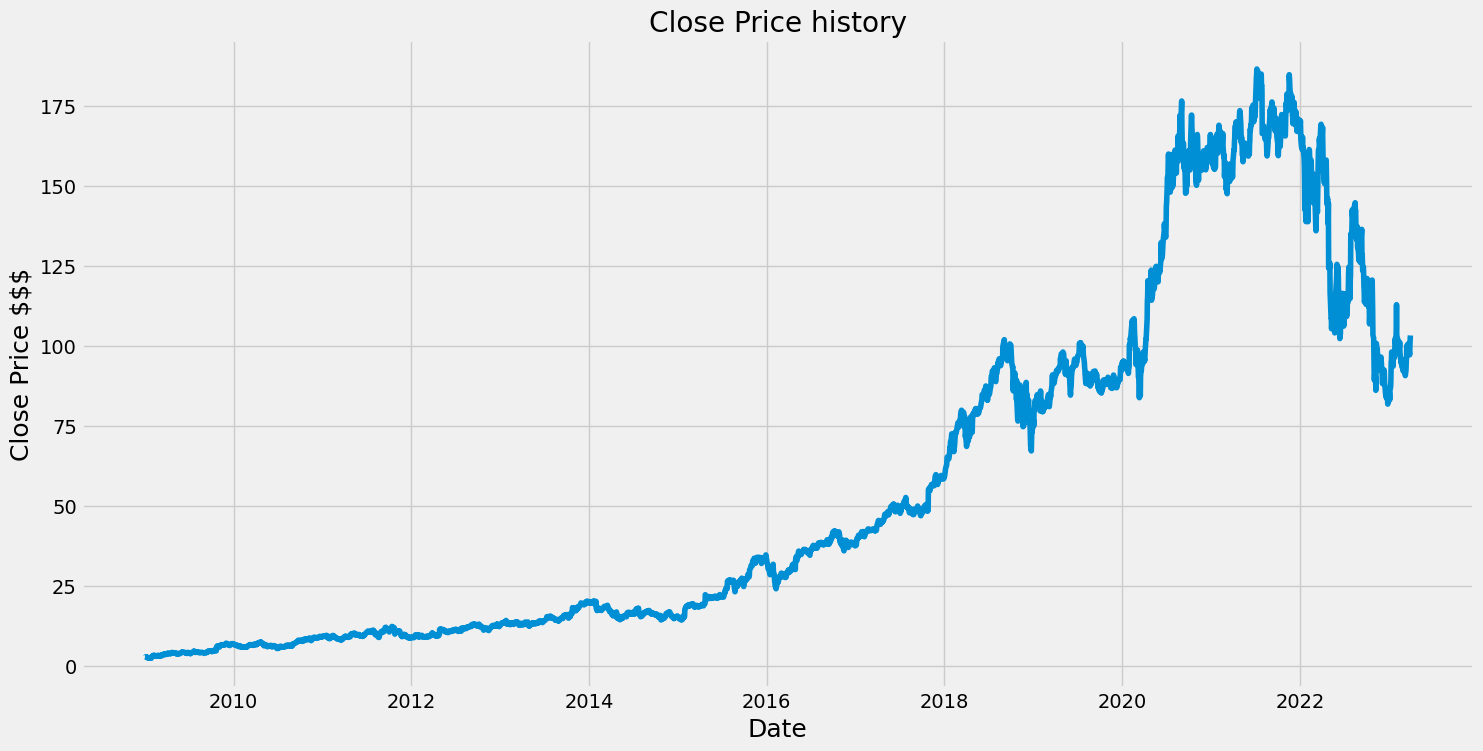

In [ ]:
#visulaize the closing data
plt.figure(figsize = (16,8))
plt.title('Close Price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price $$$', fontsize=18)
plt.show()


In [ ]:
#create New dataframe which contains only close variable
data = df.filter(['Close'])
#Data frame to numpy array
dataset = data.values
#Train data set rows
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

2869

In [ ]:
#scaling the data

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0016074 ],
       [0.00152594],
       [0.00242196],
       ...,
       [0.53124518],
       [0.54074838],
       [0.5477536 ]])

In [ ]:
#creating a Training DataSet and scaled training dataset

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([1.60739844e-03, 1.52594316e-03, 2.42195896e-03, 2.10699528e-03,
       2.36765501e-03, 1.91964711e-03, 9.44889743e-04, 8.17275529e-04,
       1.35763109e-05, 8.14560525e-04, 8.55288163e-04, 0.00000000e+00,
       5.70192109e-04, 4.07280263e-04, 5.94629727e-04, 3.23108689e-04,
       0.00000000e+00, 5.21318167e-04, 4.23571577e-04, 2.81837792e-03,
       3.45101898e-03, 4.11352897e-03, 3.42658266e-03, 4.00220477e-03,
       4.91722819e-03, 4.96067083e-03, 4.03750241e-03, 4.31988346e-03,
       4.21399056e-03, 4.02392739e-03, 3.59220951e-03, 3.77684397e-03,
       3.66823607e-03, 4.18683924e-03, 3.60307082e-03, 4.65928346e-03,
       4.14611030e-03, 3.77412897e-03, 4.43935266e-03, 3.67909609e-03,
       3.60035581e-03, 4.44478267e-03, 4.43392266e-03, 3.59764081e-03,
       3.27181582e-03, 4.68915108e-03, 5.45755267e-03, 5.73993372e-03,
       5.48198899e-03, 5.03398109e-03, 6.22052425e-03, 6.19337163e-03,
       5.88112425e-03, 5.84311032e-03, 7.36905348e-03, 6.61694321e-03,
     

In [ ]:
#converting X_train, y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train , (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2809, 60, 1)

In [ ]:
# Define the model as a sequential model
from keras.layers import Input, LSTM, Dense
from keras.models import Model
model = Sequential()

# Add the first LSTM layer with 50 units, returning sequences, and input shape (number of time steps, number of features)
# Set return_state=True to return the final hidden state and cell state
lstm1 = LSTM(50, return_sequences=True, return_state=True, input_shape=(x_train.shape[1], 1))

# Add the second LSTM layer with 50 units, not returning sequences
# Set return_state=True to return the final hidden state and cell state
lstm2 = LSTM(50, return_sequences=False, return_state=True)

# Connect the input to the first LSTM layer
inputs = Input(shape=(x_train.shape[1], 1))
x = lstm1(inputs)

# Connect the output of the first LSTM layer to the second LSTM layer
x, state_h, state_c = lstm2(x)

# Add a dense layer with 25 units
x = Dense(25)(x)

# Add the output layer with 1 unit
outputs = Dense(1)(x)

# Define the model with the input and output layers
model = Model(inputs=inputs, outputs=outputs)

# Print the model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 lstm_2 (LSTM)                  [(None, 60, 50),     10400       ['input_2[0][0]']                
                                 (None, 50),                                                      
                                 (None, 50)]                                                      
                                                                                                  
 lstm_3 (LSTM)                  [(None, 50),         20200       ['lstm_2[0][0]',                 
                                 (None, 50),                      'lstm_2[0][1]',           

In [ ]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compling the model

model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')

In [ ]:
#training the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2809/2809 [==============================] - 102s 35ms/step - loss: 0.0414


In [ ]:
model.compile(optimizer='adam', loss='mean_absolute_percentage_error')

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2809/2809 [==============================] - 102s 35ms/step - loss: 17.1458


In [ ]:
model.compile(optimizer='adam', loss='mean_absolute_percentage_error')

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2809/2809 [==============================] - 114s 38ms/step - loss: 16.9090


In [ ]:
#creating the test data
test_data = scaled_data[training_data_len-60:, :]
#creating datasets x_test, y_test
x_test=[]
y_test= dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert the data into numpy array
x_test = np.array(x_test)
x_test

array([[0.50517655, 0.52332492, 0.5092602 , ..., 0.64850924, 0.64443102,
        0.64131667],
       [0.52332492, 0.5092602 , 0.50303152, ..., 0.64443102, 0.64131667,
        0.63879425],
       [0.5092602 , 0.50303152, 0.47574922, ..., 0.64131667, 0.63879425,
        0.64999988],
       ...,
       [0.44300118, 0.4528845 , 0.44919183, ..., 0.51973271, 0.519244  ,
        0.51489966],
       [0.4528845 , 0.44919183, 0.43822244, ..., 0.519244  , 0.51489966,
        0.53124518],
       [0.44919183, 0.43822244, 0.45429642, ..., 0.51489966, 0.53124518,
        0.54074838]])

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
#Predicting the price by models
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

23/23 [==============================] - 2s 23ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
import math

# Calculate root mean squared error (RMSE)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


Mean Squared Error: 102.2727978484469
Root Mean Squared Error: 10.113001426304997


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, predictions)
print("MAPE: {:.2f}%".format(mape))

MAPE: 3.85%


In [ ]:
# Get Root Mean Square Error
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

11.245594726427656

<ipython-input-110-1cfe5b265c4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


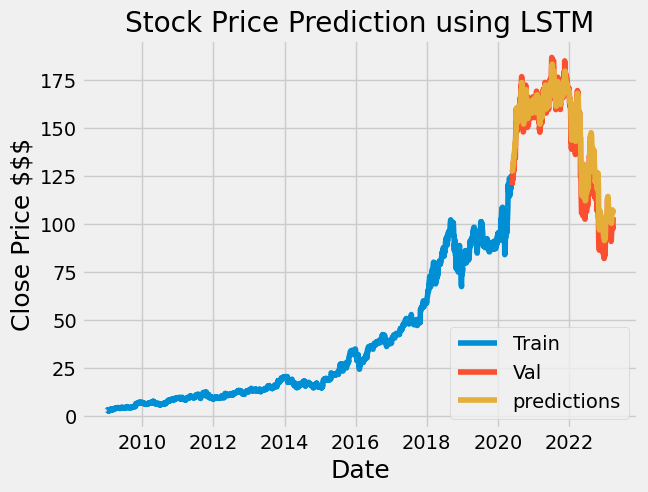

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visulizing the data
plt.figure()
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price $$$', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc = 'lower right')
plt.show()


In [ ]:
#show valid and predicted prices
valid

,Close,predictions
Date,,
2020-05-28,120.055000,128.030472
2020-05-29,122.118500,127.372513
2020-06-01,123.552002,127.546463
2020-06-02,123.620499,128.326553
2020-06-03,123.919998,129.073715
...,...,...
2023-03-27,98.040001,106.669418
2023-03-28,97.239998,106.295738
2023-03-29,100.250000,105.779373
